# Tarea 5 - Machine Learning

In [22]:
#Librerias y funciones
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Ejercicio 1al.

Investiga cuáles de las diversas herramientas de Python incluyen la funcionalidad de realizar esta acción y construye artificialmente los siguientes conjuntos de datos:

a. Conjunto de datos de tres características linealmente relacionados

Previo al desarrollo del inciso, recordemos la información sobre los datos relacionados linealmente:

Los datos se denominan lineales si la relación entre la entrada y la salida es lineal. Esto quiere decir que, cuando el valor de la entrada aumenta, el valor de la salida aumenta y viceversa, es decir, ambos datos están correlacionados. La relación inversa entre estos datos también se considera lineal y seguirá la regla de la proporcionalidad con la inversión del signo para la entrada y la salida.

Así entonces, contaremos con 3 datos $(X_{1}, X_{2}, Y)$. Donde $X_{2}$ será combinación lineal de $X_{1}$ y $Y$ será combinación lineal de $X_{2} $ y $X_{1}$. Utilizando las siguientes ecuaciones:

- $X_{1} = Normal(0,1)$
- $X_{2} = Unif(0,10) * X_{1} + Normal(0,.1)$
- $Y = Unif(0,10) * X_{1} + Unif(0,10) * X_{2} + Normal(0,.1)$ 

In [14]:
#Raíz aleatoria en torno a 0

np.random.seed(0)

n = 1000 # Num de datos

X1 = np.random.normal(0,1,n) #X1

X2 = np.random.uniform(0,10) * X1 + np.random.normal(0,.1,n) #X2

Y =  np.random.uniform(0,10) * X1 + np.random.uniform(0,10) * X2 + np.random.normal(0,.1,n) #Y

data = pd.DataFrame({'X1': X1, 'X2':X2, 'Y':Y})

labels = np.where(X1<.5,0,1)

data.head(5)

,X1,X2,Y
0,1.764052,14.566353,23.081952
1,0.400157,3.324262,5.254100
2,0.978738,8.147320,13.010073
3,2.240893,18.367695,29.361190
4,1.867558,15.323932,24.454346


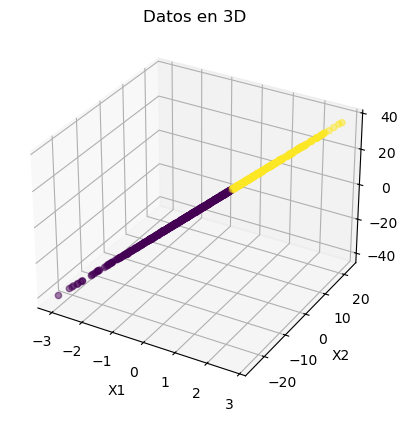

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,Y, c=labels, cmap='viridis', alpha = .5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('Datos en 3D')
plt.show()

Esto explica que:
- Conforme el valor de X1 aumenta, el de Y también
- Conforme el valor de X2 aumenta, el de Y también
- Conforme el valor de X1 aumenta, el de X2 también

b. Conjunto de datos de cuatro características, relacionados de forma completa, no lineal.

Analogo al punto anterior, los datos relacionados, pero no lineales, suelen ser un conjunto de datos que están preacondicionados en la entrada o salida, para después aplicar el modelo lineal. Esta operación transforma la relación noo lineal original en una forma lineal, por lo tanto, simplifica la manera de visualización y manipulación de los datos.

Para este caso, se utilizarán los datos $X_{1}, X_{2}, X_{3} y Y$, de la siguiente manera:

- $X_{1} = Normal(0,1)$
- $X_{2} = sin(X_{1}) + Normal(0,.1)$
- $X_{3} = X_{1}^{2} + X_{2} + Normal(0,.1)$
- $Y = 2 * X_{1}^{3} + 3 * X_{2}^{2} + log(X_{3} + 1) + Normal(0,.1)$

In [40]:
#Raíz aleatoria en torno a 0

np.random.seed(0)

n = 1000 # Num de datos

X1 = np.random.normal(0,1,n) #X1

X2 = np.sin(X1) + np.random.normal(0,.1,n) #X2

X3 = X1**2 + X2 + np.random.normal(0,.1,n) #X3

Y =  2 * X1**3 + 3 * X2**2 + np.log(X3+1) + np.random.normal(0,.1,n) #Y

data = pd.DataFrame({'X1': X1, 'X2':X2, 'X3':X3, 'Y':Y})

data.head(5)

,X1,X2,X3,Y
0,1.764052,1.036980,3.995569,15.972904
1,0.400157,0.478811,0.467739,1.256525
2,0.978738,0.787562,1.750104,4.736074
3,2.240893,0.794233,5.719998,26.328418
4,1.867558,0.979094,4.458785,17.479251


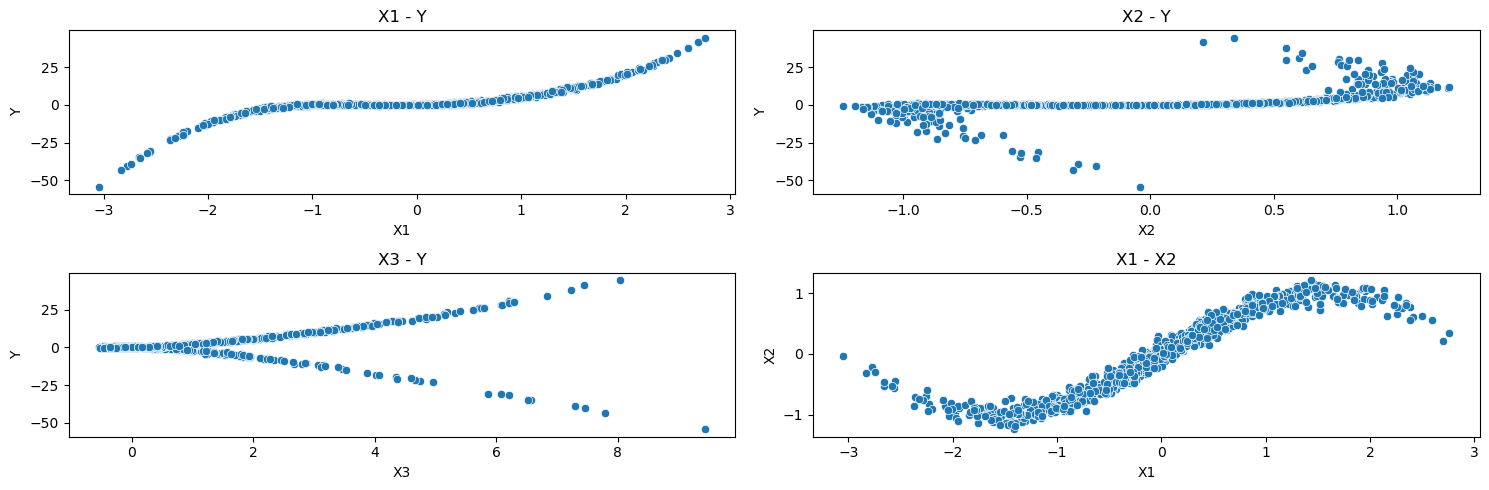

In [42]:
#Graficamente
plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
sns.scatterplot(x = data['X1'], y = data['Y'])
plt.title('X1 - Y')
plt.xlabel('X1')
plt.ylabel('Y')

plt.subplot(2,2,2)
sns.scatterplot(x = data['X2'], y = data['Y'])
plt.title('X2 - Y')
plt.xlabel('X2')
plt.ylabel('Y')

plt.subplot(2,2,3)
sns.scatterplot(x = data['X3'], y = data['Y'])
plt.title('X3 - Y')
plt.xlabel('X3')
plt.ylabel('Y')

plt.subplot(2,2,4)
sns.scatterplot(x = data['X1'], y = data['X2'])
plt.title('X1 - X2')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

c. Conjunto de datos que, de manera prevista, puedan expresar una relación lineal

## Ejercicio 2

Investiga la manera en la que se realiza el análisis de discriminante lineal Python y utiliza este conocimiento para llevar a cabo la reducción de dimensión y la representación gráfica del primer conjunto de datos construido en la pregunta anterior

El análisis de discriminante lineal (LDA) es un método de generalización del discriminante lineal de (Fisher), un método utilizado en Estadística, reconocimiento de patrones y aprendizaje automático para encontrar una combinación lineal de características que caracterice o separe dos o más clases de objetos o eventos.



In [26]:
data.head(5)

,X1,X2,Y
0,1.764052,14.566353,23.081952
1,0.400157,3.324262,5.254100
2,0.978738,8.147320,13.010073
3,2.240893,18.367695,29.361190
4,1.867558,15.323932,24.454346


In [28]:
lda = LDA(n_components = 1)
data_lda = lda.fit_transform(data, labels)

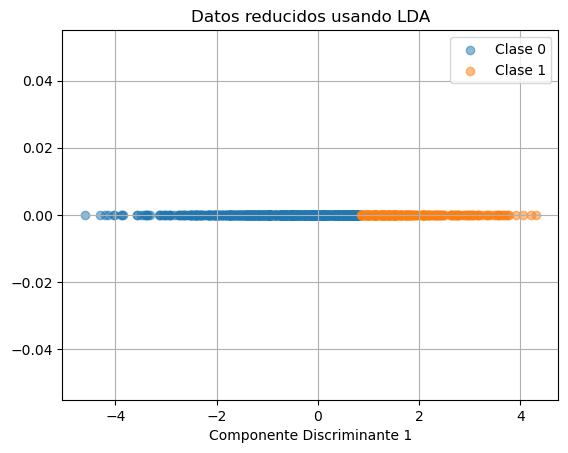

In [32]:
plt.scatter(data_lda[labels == 0], np.zeros_like(data_lda[labels == 0]), label = 'Clase 0', alpha = .5)
plt.scatter(data_lda[labels == 1], np.zeros_like(data_lda[labels == 1]), label = 'Clase 1', alpha = .5)
plt.xlabel('Componente Discriminante 1')
plt.title('Datos reducidos usando LDA')
plt.legend()
plt.grid()
plt.show()

Tal como se observa en la imagen, la reducción de dimensionalidad termina siendo exitosa, de tal manera que se notan mejor las diferencias de clases

## Ejercicio 3

Utilizando la librería Scikit-Learn, investiga cómo se implementan las métricas del error cuadrático medio y del coeficiente de determinación para evaluar la calidad de un modelo de aprendizaje supervisado

Hay distintas métricas utilizadas en la librería de Scikit-Learn, de hecho, al menos de mi conocimiento, es la librería con más funciones que conozca. Tan grande es esta librería que existe un sitio web donde están todas las utilidades de esta librería, siendo: https://scikit-learn.org/stable/

Dentro de este sitio, utilizando el buscador de 'metrics', está la librería 'sklearn.metrics'. Existen diferentes y amplias formas de evaluar un set de datos de calificación, entre ellos:

- Model Selection Interface

  a. Obtener score de un string con 'get_scorer'

  b. Obtener los nombres de los scores disponibles con 'get_scorer_names'
- Métricas de clasificación

  a. Obtener el área bajo la curva de ROC con 'roc_auc_score'

  b. Obtener la precisión con 'precision_score'
- Métricas de regresión

  a. MAE: 'mean_absolute_error'

  b. MAPE: 'mean_absolute_percentage_error'
- Métricas multilabel

  a. coverage_error

  b. label_ranking_loss
- Métricas de clústering

  a. rand_score

  b. mutual_info_score
- Biclustering metrics

  a. consensus_score
- Distance Metrics
  
  a. DistanceMetric
- Pairwise metrics

  a. pairwise_distances}

  b. pairwise_kernel_distance
- Plotting
  
  a. ROC
  
  b. PR (Precision Recall)

In [56]:
#Datos aleatorios
np.random.seed(0)
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

#Dividir el conjunto entre entrenamiento y test (20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)

In [58]:
#Modelo
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse}')

r2 = r2_score(y_test, y_pred)

print(f'R2: {r2}')

MSE: 0.9177532469714291
R2: 0.6521157503858556


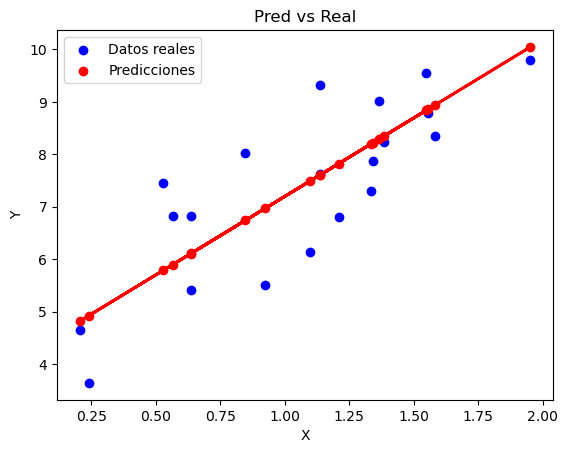

In [60]:
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.plot(X_test, y_pred, color='red', linewidth = 2) #Ajuste
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pred vs Real')
plt.legend()
plt.show()